### Load labels

In [1]:
import pandas as pd

classes_file = "../dataset/class_labels_indices.csv"

df = pd.read_csv(classes_file)
df = df.set_index('index')
df.head(50)

,mid,display_name
index,,
0,/m/09x0r,Speech
1,/m/05zppz,"Male speech, man speaking"
2,/m/02zsn,"Female speech, woman speaking"
3,/m/0ytgt,"Child speech, kid speaking"
4,/m/01h8n0,Conversation
...,...,...
45,/m/07pyy8b,Pant
46,/m/07q0yl5,Snort
47,/m/01b_21,Cough


### Build a function to extract features from audio

In [2]:
import os
import tensorflow as tf
import numpy as np

def extract_all_features(dataset_dir):
    X = []
    y = []
    
    recordset = os.listdir(dataset_dir)
    print(f"Recordset length: {len(recordset)}")
    for record in recordset:
        raw_dataset = tf.data.TFRecordDataset(dataset_dir+record)
        for raw_record in raw_dataset.take(-1):
            example = tf.train.Example()
            example.ParseFromString(raw_record.numpy())

            labels = example.features.feature['labels'].int64_list.value
                   
            example_seq = tf.train.SequenceExample()
            example_seq.ParseFromString(raw_record.numpy())
                    
            try:
                i=0
                feats_list = example_seq.feature_lists.feature_list['audio_embedding']
                while True:
                    hex_features = feats_list.feature[i].bytes_list.value[0].hex()
                    features_array = [int(hex_features[k:k+2],16) for k in range(0,len(hex_features),2)]
                            # for l in labels_detected:
                                # If there's more than one of the selected labels in the video
                    X.append(features_array)
                    y.append(labels)
                    i += 1
            except IndexError as ie:
                     #FeatureList does not have length, so we read until the end
                continue
                            
    X = np.array(X)
    y = np.array(y, dtype=object)
    
    return X,y

### Extract features from balanced set

In [3]:
X_all, y_all = extract_all_features("../dataset/audioset_v1_embeddings/bal_train/")

Recordset length: 4070


### Count number of values for each label

In [4]:
import matplotlib.pyplot as plt

counters = {}
counters_values = []
for i in y_all:
    for k in i:
        if k in counters_values:
            counters[df.iloc[k]['display_name']] += 1
        else: 
            counters[df.iloc[k]['display_name']] = 0
            counters_values.append(k)


In [16]:
top30 = dict(sorted(counters.items(), key=lambda item: item[1], reverse=True)[:30])

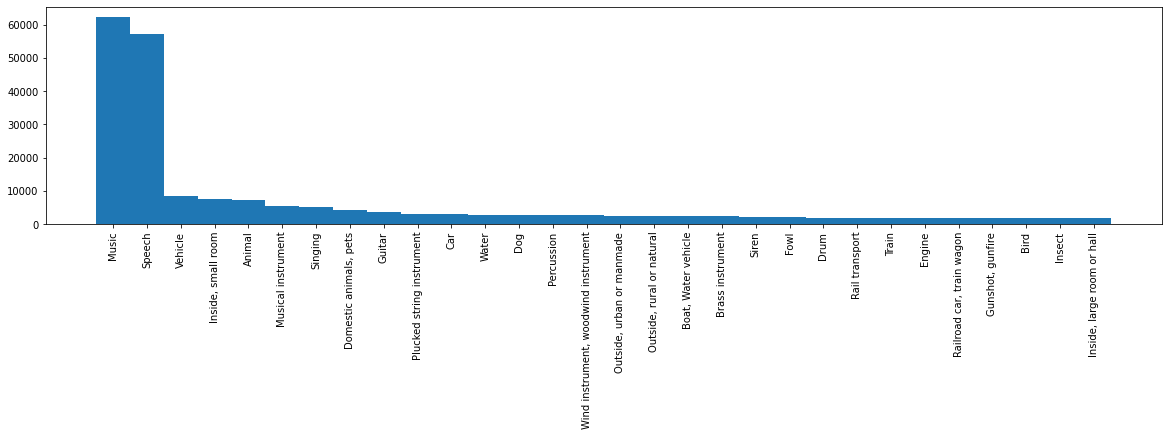

In [19]:
plt.figure(figsize=(20,4))    
plt.bar(top30.keys(), top30.values(), 1)
plt.xticks(rotation = 90)
plt.show()

### Load into a DataFrame

In [57]:
df = pd.DataFrame.from_dict(counters, orient='index', columns=['count'])
df.sort_values(by=['count'], ascending=False).head(10)

,count
Music,62296
Speech,57149
Vehicle,8581
"Inside, small room",7626
Animal,7303
Musical instrument,5319
Singing,5169
"Domestic animals, pets",4108
Guitar,3499
Plucked string instrument,3019


### Select classes
Now, let's see tha data available for the classes we're going to classify

In [60]:
selected_classes = ["Vehicle horn, car horn, honking", "Children playing", "Dog", "Jackhammer", "Siren", 
                    "Traffic noise, roadway noise", "Subway, metro, underground", "Walk, footsteps", "Chatter", "Bird"]

df_sel = df[df.index.isin(selected_classes)]
df_sel.sort_values(by=['count'], ascending=False).head(10)

,count
Dog,2724
Siren,2069
Bird,1716
"Walk, footsteps",599
Chatter,599
Children playing,599
Jackhammer,599
"Subway, metro, underground",599
"Traffic noise, roadway noise",599
"Vehicle horn, car horn, honking",584


In [29]:
import subprocess

for s in subprocess.getoutput('tasklist').split('\n'):
    if "chrome.exe" in s:
        print("Viva el chrome")
        break
    else:
        print("No")

Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal
Algo hay mal